## Question
Consider a suitable dataset. For clustering of data instances in different groups, apply different clustering techniques (minimum 2). 
Visualize the clusters using suitable tool.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

Loading and Exploring Iris Dataset

In [2]:
data = load_iris()

In [3]:
df = pd.DataFrame(data=data.data,columns = data.feature_names)
df['species'] = data.target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


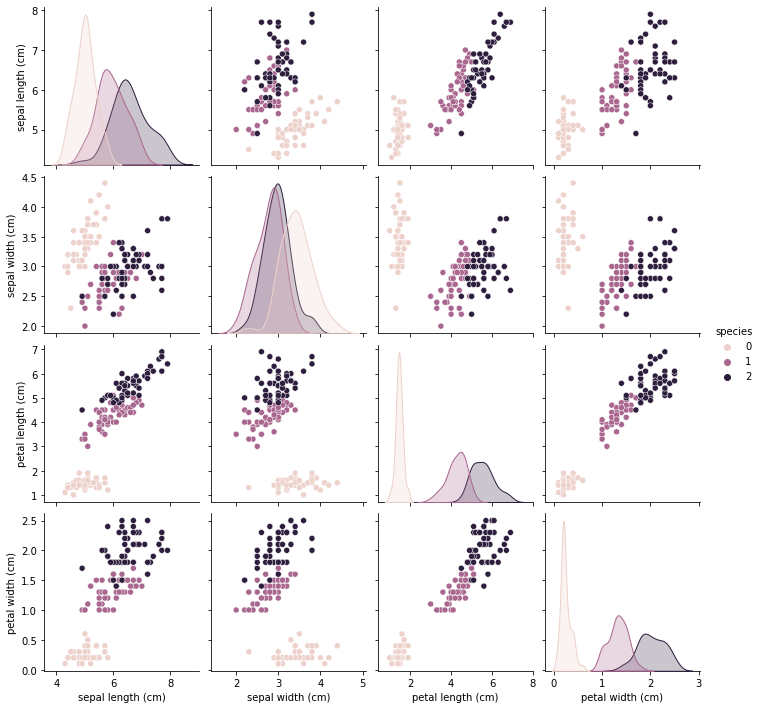

In [6]:
sns.pairplot(df,hue='species')

In [7]:
#choosing sepal length and petal length columns since clusters are more distinct

X = df.drop(['species','sepal width (cm)','petal width (cm)'],axis=1)
y = df['species']

KMeans Clustering

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=3,random_state=21)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=21)

In [10]:
#printing centers
print(kmeans.cluster_centers_)

[[5.87413793 4.39310345]
 [5.00784314 1.49215686]
 [6.83902439 5.67804878]]


In [11]:
kmeans_labels = kmeans.labels_

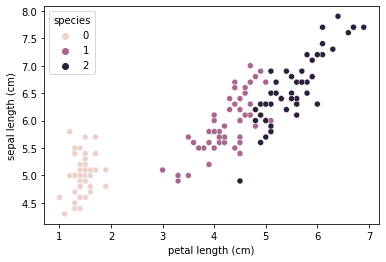

In [12]:
#original labels

sns.scatterplot(x=X['petal length (cm)'],y=X['sepal length (cm)'],hue=y)


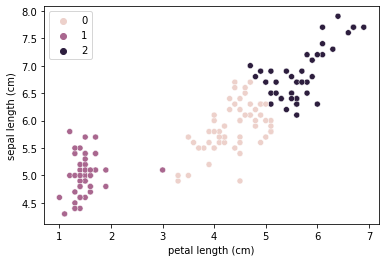

In [13]:
#labels using kmeans
sns.scatterplot(x=X['petal length (cm)'],y=X['sepal length (cm)'],hue=kmeans_labels)

#here we can see cluster 1 is equivalent of original cluster 0 i.e.
#cluster 1 -> original cluster 0, similarly
#cluster 0 -> original cluster 1
#cluster 2 -> cluster 2 

KNN Clustering

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)


In [15]:
knn.fit(X,y)

KNeighborsClassifier()

In [16]:
knn_labels = knn.predict(X)

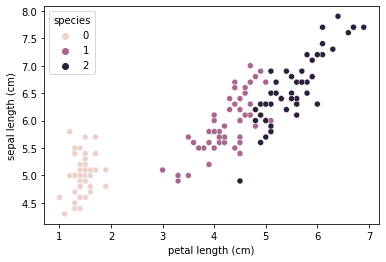

In [17]:
#original labels

sns.scatterplot(x=X['petal length (cm)'],y=X['sepal length (cm)'],hue=y)


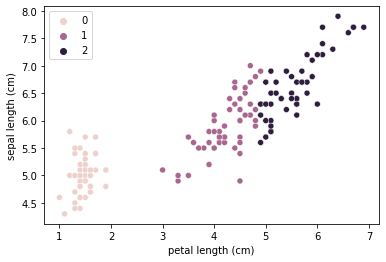

In [18]:
#labels using knn
sns.scatterplot(x=X['petal length (cm)'],y=X['sepal length (cm)'],hue=knn_labels)

#since we have used knn classifier, the original labels are mapped here